In [1]:
import pandas as pd
titanic=pd.read_csv('./titanic.txt')
print(titanic.head())

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

In [2]:
titanic.info()
#dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [3]:
#填充数据
y=titanic['survived']
x=titanic.drop(['row.names','name','survived'],axis=1) #移除无关数据
x['age'].fillna(x['age'].mean(),inplace=True)
x.fillna('UNKNOWN',inplace=True)


In [4]:
#分割数据
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [5]:
#类别特征向量化
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
#pd转换字典：x_train.to_dict(orient="records")
x_train=vec.fit_transform(x_train.to_dict(orient='record'))
x_test=vec.transform(x_test.to_dict(orient='record'))

#处理后的维度
print(len(vec.feature_names_))

474


E:\anaconda\lib\site-packages\pandas\core\frame.py:1549: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


In [6]:
#使用决策树模型进行预测和评估
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8328267477203647

In [7]:
#特征筛选
from sklearn import feature_selection
#筛选前20%的特征，依然用决策树预测
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=20)
x_train_fs=fs.fit_transform(x_train,y_train)
x_test_fs=fs.transform(x_test)
dt.fit(x_train_fs,y_train)
dt.score(x_test_fs,y_test)

0.817629179331307

In [9]:
#交叉验证 按照固定百分比间隔筛选特征
from sklearn.model_selection import cross_val_score
import numpy as np
percentiles=range(1,100,2)
results=[]

for i in percentiles:
    fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
    x_train_fs=fs.fit_transform(x_train,y_train)
    scores=cross_val_score(dt,x_train_fs,y_train,cv=5)
    results=np.append(results,scores.mean())
print(results)

#找到最佳性能对应的百分比
opt=np.where(results==results.max())[0][0]
print('Optimal feature:%d'%percentiles[opt])

[0.85064229 0.85673884 0.87502849 0.88621154 0.86484513 0.86381954
 0.86992127 0.86890086 0.86890604 0.87195172 0.86585517 0.8709365
 0.86484513 0.86890604 0.86179426 0.86484513 0.86687558 0.86383508
 0.86382472 0.86179426 0.8597638  0.85976898 0.86483995 0.86382472
 0.86891122 0.86586553 0.87095722 0.87094168 0.86586553 0.87095204
 0.87095722 0.86993163 0.87501813 0.87093132 0.87297213 0.86992645
 0.86993163 0.87399772 0.86790117 0.86789599 0.86585517 0.87095722
 0.86587071 0.86281467 0.86280431 0.86179426 0.85772299 0.8587434
 0.86687558 0.86178908]
Optimal feature:7


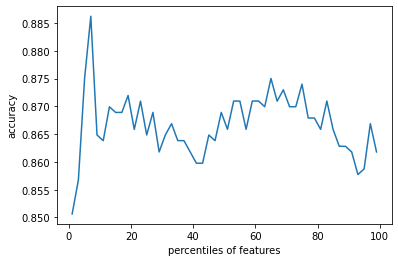

In [10]:
#画图
import pylab as pl
pl.plot(percentiles,results)
pl.xlabel('percentiles of features')
pl.ylabel('accuracy')
pl.show()

In [11]:
#使用最佳特征

from sklearn import feature_selection
#筛选前20%的特征，依然用决策树预测
fs=feature_selection.SelectPercentile(feature_selection.chi2,percentile=7)
x_train_fs=fs.fit_transform(x_train,y_train)
x_test_fs=fs.transform(x_test)
dt.fit(x_train_fs,y_train)
dt.score(x_test_fs,y_test)

0.8571428571428571